In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from transformers import pipeline,AutoTokenizer,TFAutoModelForSequenceClassification
from scipy.special import softmax

In [2]:
df=pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [4]:
df.shape

(568454, 10)

In [5]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [6]:
df.dropna(inplace=True,axis=0)

In [7]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Score', ylabel='count'>

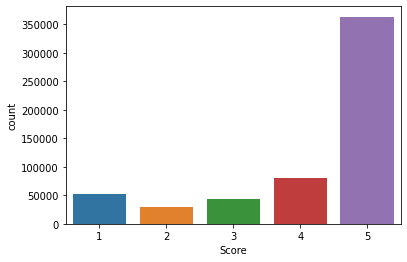

In [8]:
sns.countplot(df.Score)

In [9]:
print('users with over 1 reviews  :',(df['UserId'].value_counts() >  0).sum())
print('users with over 5 reviews  :',(df['UserId'].value_counts() >  5).sum())
print('users with over 10 reviews :',(df['UserId'].value_counts() > 10).sum())
print('users with over 20 reviews :',(df['UserId'].value_counts() > 20).sum())
print('users with over 30 reviews :',(df['UserId'].value_counts() > 30).sum())
print('users with over 50 reviews :',(df['UserId'].value_counts() > 50).sum())

users with over 1 reviews  : 256047
users with over 5 reviews  : 18175
users with over 10 reviews : 6358
users with over 20 reviews : 1702
users with over 30 reviews : 703
users with over 50 reviews : 260


In [10]:
one_score_df=df[df['Score']==1].sample(100)
two_score_df=df[df['Score']==2].sample(100)
three_score_df=df[df['Score']==3].sample(100)
four_score_df=df[df['Score']==4].sample(100)
five_score_df=df[df['Score']==5].sample(100)
df1=pd.concat([one_score_df,two_score_df,three_score_df,four_score_df,five_score_df])

In [11]:
df1.shape

(500, 10)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Score', ylabel='count'>

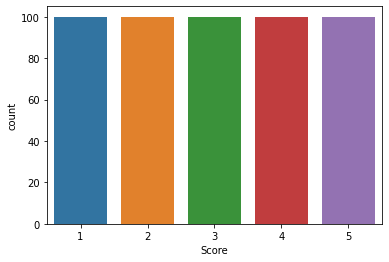

In [12]:
sns.countplot(df1.Score)

In [13]:
df1=df1[['Id', 'Score', 'Time', 'Summary', 'Text']]

In [14]:
df1.head(3)

,Id,Score,Time,Summary,Text
283489,283490,1,1344816000,Dont buy,It came broken in pieces. The ribbon was dull ...
220132,220133,1,1322870400,EXTREMELY SMALL BOXES! VERY DISAPPOINTING,Just received these two boxes which I purchase...
164505,164506,1,1254268800,Coffee Chupa Chups,As this order of Coffee Chuppa Chups was cance...


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 283489 to 526895
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       500 non-null    int64 
 1   Score    500 non-null    int64 
 2   Time     500 non-null    int64 
 3   Summary  500 non-null    object
 4   Text     500 non-null    object
dtypes: int64(3), object(2)
memory usage: 39.6+ KB


# BERT Pretrained Model:

In [16]:
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, from_pt=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

2022-09-25 17:48:34.521508: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-25 17:48:34.522804: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-25 17:48:34.523604: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-25 17:48:34.525649: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Downloading:   0%|          | 0.00/638M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [17]:
# MODEL=f"cardiffnlp/twitter-roberta-base-sentiment"
# tokenizer=AutoTokenizer.from_pretrained(MODEL)
# model=AutoModelForSequenceClassification.from_pretrained(MODEL)

In [18]:
example=df1['Summary'].values[0]
example

'Dont buy'

In [19]:
tokenizer(example)

{'input_ids': [101, 11930, 35172, 102], 'token_type_ids': [0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1]}

In [20]:
classifier(example)[0]

{'label': '5 stars', 'score': 0.31933990120887756}

In [21]:
print(df1['Score'].values[0])

1


In [22]:
dict={}
for Id,Summary in df1[['Id','Summary']].values:
    res=classifier(Summary)
    dict[Id]=res[0]

In [23]:
pred_reviews=pd.DataFrame(dict).T

In [24]:
pred_reviews.head()

,label,score
283490,5 stars,0.31934
220133,1 star,0.560305
164506,4 stars,0.269262
208435,5 stars,0.359861
334152,1 star,0.663169


In [25]:
pred_reviews.to_csv('pred_reviews500.csv')

In [26]:
pred_reviews = pred_reviews.reset_index().rename(columns={'index': 'Id'})

In [27]:
pred_reviews.head()

,Id,label,score
0,283490,5 stars,0.31934
1,220133,1 star,0.560305
2,164506,4 stars,0.269262
3,208435,5 stars,0.359861
4,334152,1 star,0.663169


In [28]:
df2 = pred_reviews.merge(df1, how='left')

In [29]:
df2.head()

,Id,label,score,Score,Time,Summary,Text
0,283490,5 stars,0.31934,1,1344816000,Dont buy,It came broken in pieces. The ribbon was dull ...
1,220133,1 star,0.560305,1,1322870400,EXTREMELY SMALL BOXES! VERY DISAPPOINTING,Just received these two boxes which I purchase...
2,164506,4 stars,0.269262,1,1254268800,Coffee Chupa Chups,As this order of Coffee Chuppa Chups was cance...
3,208435,5 stars,0.359861,1,1317081600,Bait & Switch,**Vine Voices will receive a total of 3 Licket...
4,334152,1 star,0.663169,1,1336780800,Loaded with sugars and contains undeclared fat...,"People, learn how to read nutrition labels. Se..."


In [30]:
df2=df2.rename(columns={'score':'Pred_score','label':'Pred_label'})

In [31]:
df2.head(3)

,Id,Pred_label,Pred_score,Score,Time,Summary,Text
0,283490,5 stars,0.31934,1,1344816000,Dont buy,It came broken in pieces. The ribbon was dull ...
1,220133,1 star,0.560305,1,1322870400,EXTREMELY SMALL BOXES! VERY DISAPPOINTING,Just received these two boxes which I purchase...
2,164506,4 stars,0.269262,1,1254268800,Coffee Chupa Chups,As this order of Coffee Chuppa Chups was cance...


In [32]:
df2.to_csv('pred_and_real_reviews_scores.csv')

In [33]:
df3=pd.read_csv('./pred_and_real_reviews_scores.csv')

In [34]:
df3.head()

,Unnamed: 0,Id,Pred_label,Pred_score,Score,Time,Summary,Text
0,0,283490,5 stars,0.319340,1,1344816000,Dont buy,It came broken in pieces. The ribbon was dull ...
1,1,220133,1 star,0.560305,1,1322870400,EXTREMELY SMALL BOXES! VERY DISAPPOINTING,Just received these two boxes which I purchase...
2,2,164506,4 stars,0.269262,1,1254268800,Coffee Chupa Chups,As this order of Coffee Chuppa Chups was cance...
3,3,208435,5 stars,0.359861,1,1317081600,Bait & Switch,**Vine Voices will receive a total of 3 Licket...
4,4,334152,1 star,0.663169,1,1336780800,Loaded with sugars and contains undeclared fat...,"People, learn how to read nutrition labels. Se..."


In [35]:
df3=df3.rename(columns={'Pred_label':'Pred_stars','Score':'Review_stars'})

In [36]:
df3['Pred_stars']=df3['Pred_stars'].map(lambda x: x.split()[0])

In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    500 non-null    int64  
 1   Id            500 non-null    int64  
 2   Pred_stars    500 non-null    object 
 3   Pred_score    500 non-null    float64
 4   Review_stars  500 non-null    int64  
 5   Time          500 non-null    int64  
 6   Summary       500 non-null    object 
 7   Text          500 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 31.4+ KB


In [38]:
df3.head()

,Unnamed: 0,Id,Pred_stars,Pred_score,Review_stars,Time,Summary,Text
0,0,283490,5,0.319340,1,1344816000,Dont buy,It came broken in pieces. The ribbon was dull ...
1,1,220133,1,0.560305,1,1322870400,EXTREMELY SMALL BOXES! VERY DISAPPOINTING,Just received these two boxes which I purchase...
2,2,164506,4,0.269262,1,1254268800,Coffee Chupa Chups,As this order of Coffee Chuppa Chups was cance...
3,3,208435,5,0.359861,1,1317081600,Bait & Switch,**Vine Voices will receive a total of 3 Licket...
4,4,334152,1,0.663169,1,1336780800,Loaded with sugars and contains undeclared fat...,"People, learn how to read nutrition labels. Se..."


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Review_stars', ylabel='count'>

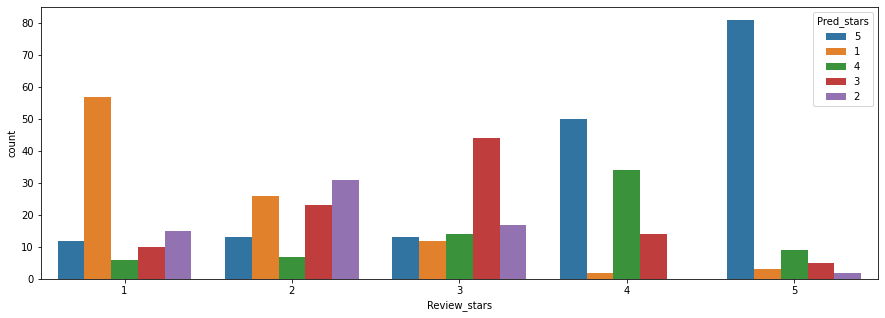

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(df3['Review_stars'],hue=df3['Pred_stars'])

Observations :The Predictions from reviews are correlated with the stars.  